In [54]:
#importing libraries
import pandas as pd
import requests
import zipfile
import os
import shutil
import matplotlib.pyplot as plt

# Descriptive Statistics / Exploratory Data Analysis I

In [ ]:
# Step 1 : For downloading file
for year in range(1975,2021,5):
    
    # Making the url and filename with year substituion
    url = f"https://static.nhtsa.gov/nhtsa/downloads/FARS/{year}/National/FARS{year}NationalCSV.zip"
    filename = f"FARS{year}NationalCSV.zip"
    
    print(f'Start downloading file for year : {year}')
    
    # Calling requests library/module to download the url
    r = requests.get(url, allow_redirects=True)
    
    # opening a file for writing 
    # 'wb': for writing byte mod
    # 'w' : writing file in string mode
    with open(filename,'wb') as f:
        f.write(r.content)
    
    print(f'Download completed for year :{year}')

In [12]:
# Step 2 : To uncompress the files into year directory

# Use os module to generate/create directory with year
for year in range(1975,2021,5):
    directory = f'{year}'
    # os module has path submodule
    # which has a function exists
    # this function checks if path/directory exists : returns true
    # else it returns false
    if not os.path.exists(directory):
        # in os module, mkdir function creates the 
        # path/directory passed to it
        os.mkdir(directory)

In [13]:
#extracting the files into year directory
for year in range(1975,2021,5):
    filename = f"FARS{year}NationalCSV.zip"
    directory = f'{year}'
    
    # calling a ZipFile function from zipfile module
    # to open a zip file
    with zipfile.ZipFile(filename,'r') as zip_ref:
        # extracting the files into year directory
        zip_ref.extractall(directory)

In [14]:
# Step 3 : copying all accident.csv files into directory accident_all_years
newDir = "accident_all_years"
if not os.path.exists(newDir):
    os.mkdir(newDir)

In [15]:
for year in range(1975,2021,5):
    for file in [ 'ACCIDENT.CSV' ,'accident.csv']:
        oldPath = f'{year}/{file}'
        newPath = f'{newDir}/{year}_accident.csv'
        if os.path.exists(oldPath):
            # print(oldPath)
            # print(newPath)
            shutil.copy(oldPath,newPath)
        else:
            oldPath = f'{year}/FARS{year}NationalCSV/{file}'
            newPath = f'{newDir}/{year}_accident.csv'
            if os.path.exists(oldPath):
                # print(oldPath)
                # print(newPath)
                shutil.copy(oldPath,newPath)            

## 1. What is the overall number fatal accidents for the entire dataset period from 1975-2020? (Note: the denomenator is the total number of accidents)

In [24]:
# initiate variables for totalAccidents and fatalAccidents
totalAccidents = 0
fatalAccidents = 0

#fromthe directory accident_all_years folder iterate over all files from 1975 to 2020
for year in range(1975,2021,5):
    #create a dataframe for each year
    df = pd.read_csv(f'accident_all_years/{year}_accident.csv',encoding='ISO-8859-1')
     
    
    """ print(f"{year} : {df.loc[df.FATALS > 0,'FATALS'].count()} : {df.FATALS.value_counts().get(0)} : {df.shape[0]}")
    if df.FATALS.value_counts().get(0) == None :
        fatalAccidents += (df.shape[0])
    else:
        fatalAccidents += (df.shape[0] - df.FATALS.value_counts().get(0))
        totalAccidents +=  df.shape[0]  """
   
    
    # print(f"{year} : {df.loc[df.FATALS > 0,'FATALS'].count()} : {df.loc[df.FATALS == 0,'FATALS'].count()} : {df.shape[0]}")
    fatalAccidents += (df.shape[0] - df.loc[df.FATALS == 0,'FATALS'].count())
    totalAccidents +=  df.shape[0] 

print(f"Total Accidents : {totalAccidents}")
print(f"Total Fatal Accidents : {fatalAccidents}")

Total Accidents : 376265
Total Fatal Accidents : 376255


## 2. How many people died over that period? How many total people were involved (fatal and non-fatal)?

In [40]:
# initiate variable for fatalDeaths and personsInvolved
fatalDeaths = 0
personsInvolved = 0

#initiate variable for header to be True
header = True

#iterate through all files from 1975 to 2020
for year in range(1975,2021,5):
    #create a dataframe for each year
    df = pd.read_csv(f'accident_all_years/{year}_accident.csv',encoding='ISO-8859-1')

    if header == True:
        header = False
        print(f'{"YEAR":10}{"Casualities":14}{"Survived":11}{"Involved":11}')
    print(f'{year:<10}{df.FATALS.sum():<14}{df.PERSONS.sum() - df.FATALS.sum():<11}{df.PERSONS.sum():<11}')
    fatalDeaths += df.FATALS.sum()
    personsInvolved += df.PERSONS.sum()

print(f"Total Fatal Deaths : {fatalDeaths}")
print(f"Total Persons Involved : {personsInvolved}")

YEAR      Casualities   Survived   Involved   
1975      44525         60371      104896     
1980      51091         62198      113289     
1985      43825         60177      104002     
1990      44599         63178      107777     
1995      41817         60285      102102     
2000      41945         58771      100716     
2005      43510         57752      101262     
2010      32999         36384      69383      
2015      35484         39072      74556      
2020      39007         39151      78158      
Total Fatal Deaths : 418802
Total Persons Involved : 956141


## 3. What proportion of accidents occurred between 9pm and 4am (overnight)?

In [45]:
#initiate the variable for total accident and night accidents
totalAccidents = 0
nightAccidents = 0

print('For Accidents between 9 pm to 4 am:')
print('=====================================')
#iterate through all files from 1975 to 2020
for year in range(1975,2021,5):
    #create a dataframe for each year
    df = pd.read_csv(f'accident_all_years/{year}_accident.csv',encoding='ISO-8859-1')
    totalAccidents += df.shape[0]
    nightAccidents += df.loc[(((df.HOUR != 99) & ((df.HOUR >= 21) | (df.HOUR <=4))) |((df.HOUR != 88) & ((df.HOUR >= 21) | (df.HOUR <=4)))), :].shape[0]
    print(f" {year} : {df.loc[(((df.HOUR != 99) & ((df.HOUR >= 21) | (df.HOUR <=4))) |((df.HOUR != 88) & ((df.HOUR >= 21) | (df.HOUR <=4)))), :].shape[0]}/{df.shape[0]} => {df.loc[(((df.HOUR != 99) & ((df.HOUR >= 21) | (df.HOUR <=4))) |((df.HOUR != 88) & ((df.HOUR >= 21) | (df.HOUR <=4)))), :].shape[0]*100/df.shape[0]:0.2f}%")
print(f'Overall Percentage of Night Accidents : {nightAccidents*100/totalAccidents:0.2f} %')

For Accidents between 9 pm to 4 am:
 1975 : 15499/39161 => 39.58%
 1980 : 19944/45284 => 44.04%
 1985 : 14956/39196 => 38.16%
 1990 : 15011/39836 => 37.68%
 1995 : 12459/37241 => 33.46%
 2000 : 12169/37526 => 32.43%
 2005 : 12829/39252 => 32.68%
 2010 : 9836/30296 => 32.47%
 2015 : 10345/32538 => 31.79%
 2020 : 11885/35935 => 33.07%
Overall Percentage of Night Accidents : 35.86 %


## 4. What proportion of accidents occurred when the weather was snowy?

In [46]:
#get the DATA for 1975
df = pd.read_csv(f'accident_all_years/1975_accident.csv',encoding='ISO-8859-1')

In [48]:
#get the columns for 1975
df.columns

Index(['STATE', 'COUNTY', 'MONTH', 'DAY', 'YEAR', 'HOUR', 'MINUTE', 'VE_FORMS',
       'PERSONS', 'VEHICLES', 'LAND_USE', 'CL_TWAY', 'ROAD_FNC', 'TA_1_CL',
       'SP_JUR', 'HARM_EV', 'MAN_COLL', 'REL_JUNC', 'REL_ROAD', 'ROAD_FLO',
       'NO_LANES', 'SP_LIMIT', 'ALIGNMNT', 'PROFILE', 'PAVE_TYP', 'SUR_COND',
       'TRA_CONT', 'LGT_COND', 'WEATHER', 'HIT_RUN', 'C_M_ZONE', 'NOT_HOUR',
       'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'SCH_BUS', 'CF1', 'CF2', 'CF3',
       'FATALS', 'DAY_WEEK', 'DRUNK_DR', 'ST_CASE', 'CITY', 'RAIL'],
      dtype='object')

In [49]:
#get the unique values for weather condition
df.WEATHER.value_counts() #snow is 4 across all years

1    32847
2     3953
9      811
4      742
7      728
3       80
Name: WEATHER, dtype: int64

In [52]:
#initiate the variables for total accidents and snow accidents
totalAccidents = 0
snowAccidents = 0

print('For Accidents in Snowy Weather:')
print('=================================')
#iterate through all files from 1975 to 2020
for year in range(1975,2021,5):
    #create a dataframe for each year
    df = pd.read_csv(f'accident_all_years/{year}_accident.csv',encoding='ISO-8859-1')
    totalAccidents += df.shape[0]
    snowAccidents += df.loc[df.WEATHER == 4,:].shape[0]
    print(f" {year} : {df.loc[df.WEATHER == 4,:].shape[0]}/{df.shape[0]} => {df.loc[df.WEATHER == 4,:].shape[0]*100/df.shape[0]:0.2f}%")
print('=====================================')
print(f'Overall Percentage of Snow Accidents : {snowAccidents*100/totalAccidents:0.2f} %')

For Accidents in Snowy Weather :
 1975 : 742/39161 => 1.89%
 1980 : 808/45284 => 1.78%
 1985 : 805/39196 => 2.05%
 1990 : 519/39836 => 1.30%
 1995 : 739/37241 => 1.98%
 2000 : 752/37526 => 2.00%
 2005 : 639/39252 => 1.63%
 2010 : 544/30296 => 1.80%
 2015 : 318/32538 => 0.98%
 2020 : 283/35935 => 0.79%
Overall Percentage of Snow Accidents : 1.63 %


## 5. Build a line graph that shows the total fatalities by year (using the dataset with just every 5 years of data).

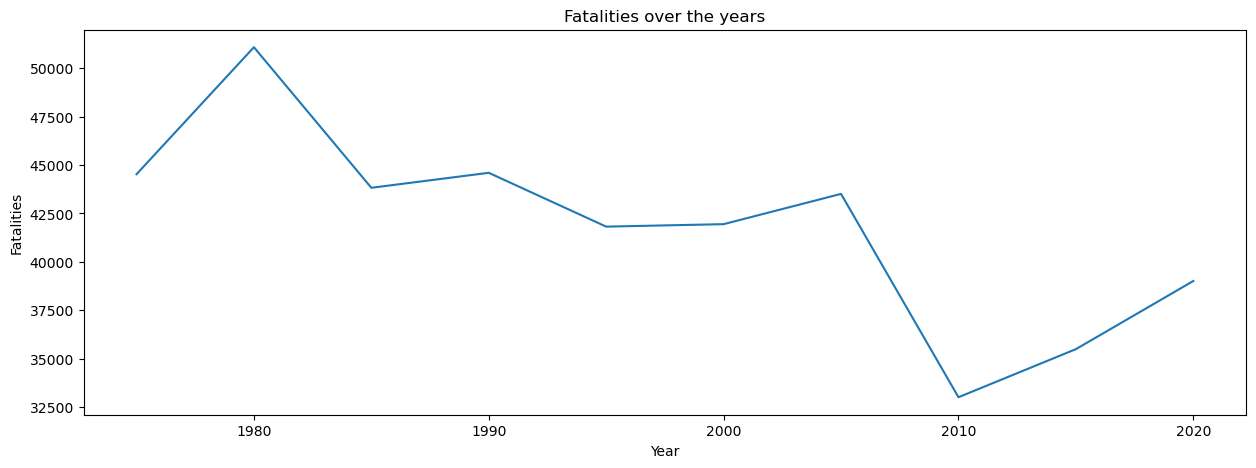

In [55]:
#plot line graph for accidents over the years
## get the total fatalities for each year
fatalities = []
for year in range(1975,2021,5):
    df = pd.read_csv(f'accident_all_years/{year}_accident.csv',encoding='ISO-8859-1')
    fatalities.append(df.FATALS.sum())

## plot the line graph
plt.figure(figsize=(15,5))
plt.plot(range(1975,2021,5),fatalities)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.title('Fatalities over the years')
plt.show()

## 6. Make a general statement about what you observe in the line graph.

### The fatalities have been decreasing over the years.
### The highest and lowest occurence occured in 1980 and 2010 respectively.

# Descriptive Statistics / Exploratory Data Analysis II

## 1. From 1975-2020, what was the average (mean) rate of fatal accidents which involved an intoxicated driver? This would be over all states.

In [88]:
#get the intoxicated driver related fatalities for each year
fatalities = []
for year in range(1975,2021,5):
    df = pd.read_csv(f'accident_all_years/{year}_accident.csv',encoding='ISO-8859-1')
    #append the sum of fatalities for each year where DRUNK_DR > 0
    fatalities.append(df.loc[df.DRUNK_DR > 0,'FATALS'].sum())
    #print the sum of fatalities for each year where DRUNK_DR > 0
    print(f"{year} : {df.loc[df.DRUNK_DR > 0,'FATALS'].sum()}")

## get the average of all the fatalities
avg = sum(fatalities)/len(fatalities)
print(f"Average Fatalies which involved an intoxicated driver : {avg}")

1975 : 9027
1980 : 21151
1985 : 18040
1990 : 18279
1995 : 13881
2000 : 14856
2005 : 15101
2010 : 10625
2015 : 10245
2020 : 10636
Average Fatalies which involved an intoxicated driver : 14184.1
